point is above line
point is below line
point is above line
point is below line
point is below line
point is above line
point is above line
point is above line
point is above line
point is above line
point is below line
point is above line
point is above line
point is below line
point is above line
point is below line
point is below line
point is below line
point is below line
point is below line
point is below line
point is below line
point is above line
point is above line
point is below line
point is above line
point is below line
point is below line
point is below line
point is above line
point is below line
point is below line
point is above line
point is above line
point is above line
point is above line
point is below line
point is above line
point is below line
point is above line
point is above line
point is above line
point is above line
point is above line
point is above line
point is below line
point is below line
point is below line
point is above line
point is above line


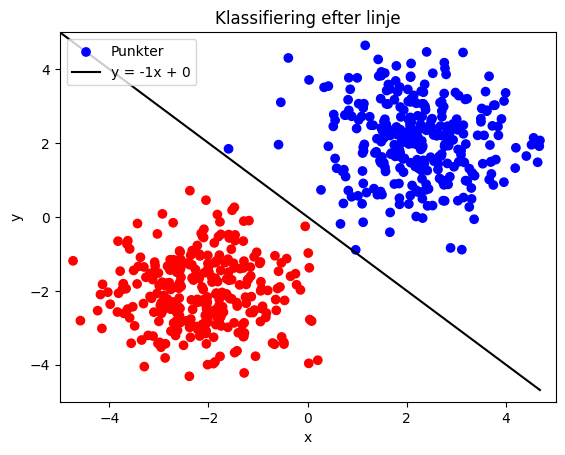

NameError: name 'yx' is not defined

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



k = -1
m = 0


def f_line(x):
    return x * -0.489

def g_line(x):
    return x * -2 + 0.16

def h_line(x):
    return x * 800 - 120   

def classify_datapoints(x, y, k, m):
    y_line = k * x + m
    if y >= y_line:
        print("point is above line")
        return 1
    else:
        print("point is below line")
        return 0

def classify_f_line(x, y, k, m):
    f_line = k * x + m
    if y >= f_line:
        print("point is above line")
        return 1
    else:
        print("point is below line")
        return 0    

def classify_g_line(x, y, k, m):
    g_line = k * x + m
    if y >= g_line:
        print("point is above line")
        return 1
    else:
        print("point is below line")
        return 0        

def classify_h_line(x, y, k, m):
    h_line = k * x + m
    if y >= h_line:
        print("point is above line")
        return 1
    else:
        print("point is below line")
        return 0    
    


def plot_classify(data, k, m):
    colors = data["label"].map({0: "red", 1:"blue"})
    plt.scatter(data["x"], data["y"], c = colors, label = "Punkter")

    x_vals = sorted(data["x"])
    y_vals = [k * x + m for x in x_vals]
    plt.plot(x_vals, y_vals, color = "black", label = f"y = {k}x + {m}")

    #plt.plot(x_vals, [f_line(x) for x in x_vals], color = "green", label = f"f(x) = -0.489x")
    #plt.plot(x_vals, [g_line(x) for x in x_vals], color = "yellow", label = f"g(x) = -2 + 0.16")
    #plt.plot(x_vals, [h_line(x) for x in x_vals], color = "purple", label = f"h(x) = 800x - 120")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Klassifiering efter linje")
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.legend(loc = 'upper left')
    plt.show()

    #Kan man göra variabler/listor här som lagrar de olika klassifieringarna och sen tar datan och slänger in den i en bar graf?


    plt.bar(["y(x)", "f(x)", "g(x)", "h(x)"], [yx, fx, gx, hx])
    plt.ylabel("Mängden felklassifierade punkter i procent")
    plt.xlabel("funktioner")


if __name__=="__main__":

    filename = "unlabelled_data.csv"

    data = pd.read_csv(filename)

    data.columns = ["x", "y"]
    data["label"] = data.apply(lambda row: classify_datapoints(row["x"], row["y"], k, m), axis=1)
    data["label2"] = data.apply(lambda row: classify_f_line(row["x"], row["y"], k, m), axis=1)
    data["label3"] = data.apply(lambda row: classify_g_line(row["x"], row["y"], k, m), axis=1)
    data["label4"] = data.apply(lambda row: classify_h_line(row["x"], row["y"], k, m), axis=1)

    dataPoints = pd.read_csv(filename, header = None)
    dataPoints['yx'] = dataPoints.apply(lambda row : classify_datapoints(-1, 0, row[0], row[1]), axis = 1)
    dataPoints['fx'] = dataPoints.apply(lambda row : classify_f_line(-0.489, 0, row[0], row[1]), axis = 1)
    dataPoints['gx'] = dataPoints.apply(lambda row : classify_g_line(-2, 0.16, row[0], row[1]), axis = 1)
    dataPoints['hx'] = dataPoints.apply(lambda row : classify_h_line(800, -120, row[0], row[1]), axis = 1)   

    data.to_csv("labelled_data.csv",index=False)

    plot_classify(data, k, m)
